<a href="https://colab.research.google.com/github/Rishikesh23a/-Handwritten-Character-Recognition/blob/main/Handwritten_Character_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the Dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load CSV
df = pd.read_csv("/content/A_Z Handwritten Data.csv")

# Separate features and labels
X = df.drop('0', axis=1).values  # pixel data
y = df['0'].values               # labels (0–25)

# Normalize pixel values
X = X / 255.0

# Reshape to (n, 28, 28, 1)
X = X.reshape(-1, 28, 28, 1)

# One-hot encode labels
y = to_categorical(y, num_classes=26)


Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Build CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(26, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile & Train

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.1)


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.8376 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 9/10
22/22 ━━━━━━━━━

Evaluate

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.2f}")


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: nan
Test Accuracy: 1.00


Predict & Show Example

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


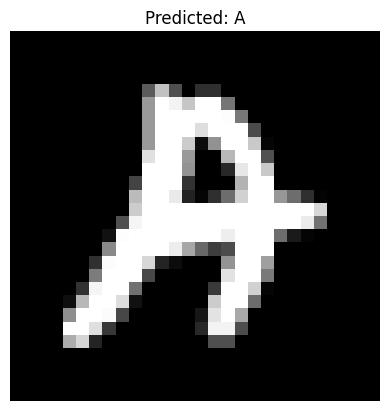

In [ ]:
import matplotlib.pyplot as plt

# Pick a test sample
idx = 0
sample = X_test[idx].reshape(28,28)

plt.imshow(sample, cmap='gray')
plt.title("Predicted: " + chr(np.argmax(model.predict(X_test[idx:idx+1])) + 65))  # ASCII
plt.axis('off')
plt.show()


Predict and Show 10 Random Test Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


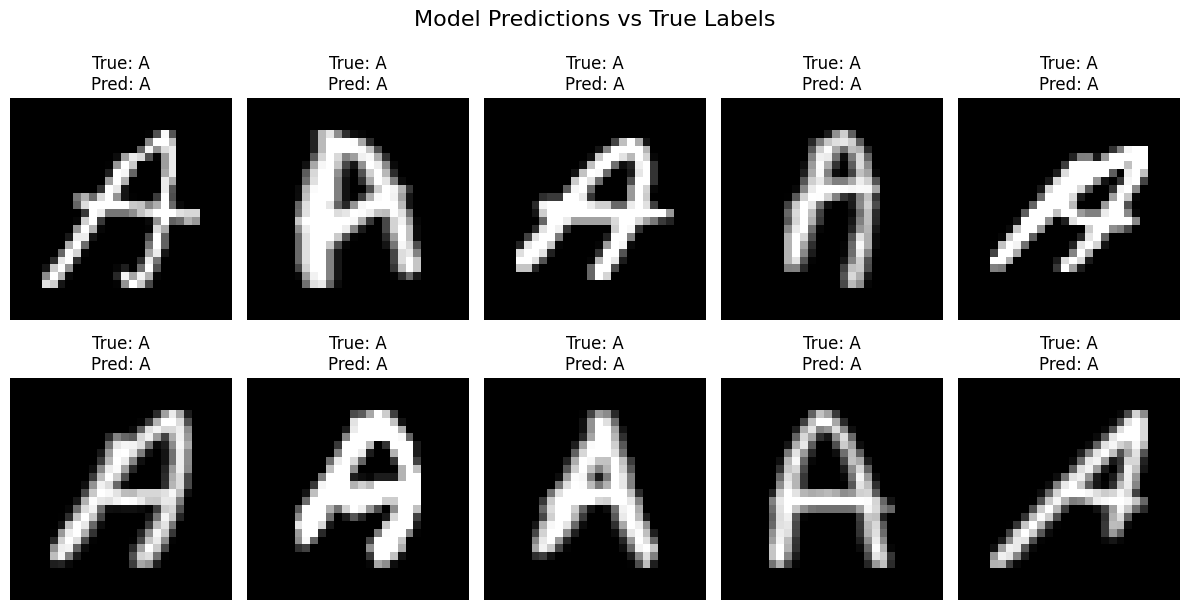

In [ ]:
import random

label_map = {i: chr(65 + i) for i in range(26)}  # 0='A', 1='B', ..., 25='Z'

plt.figure(figsize=(12, 6))
for i in range(10):
    idx = random.randint(0, len(X_test) - 1)
    image = X_test[idx].reshape(28, 28)
    true_label = label_map[np.argmax(y_test[idx])]
    pred_label = label_map[np.argmax(model.predict(X_test[idx:idx+1]))]

    plt.subplot(2, 5, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.suptitle("Model Predictions vs True Labels", fontsize=16, y=1.05)
plt.show()


Predict and Count Overall Accuracy (Extra View)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

acc = accuracy_score(y_true, y_pred)
print(f"Overall Test Accuracy: {acc:.4f}")


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
Overall Test Accuracy: 1.0000


Visualize Misclassified Samples

In [ ]:
misclassified_idxs = np.where(y_pred != y_true)[0]

if len(misclassified_idxs) > 0:
    print(f"Total misclassified samples: {len(misclassified_idxs)}")

    plt.figure(figsize=(12, 6))
    for i, idx in enumerate(misclassified_idxs[:10]):
        image = X_test[idx].reshape(28, 28)
        true_label = label_map[y_true[idx]]
        pred_label = label_map[y_pred[idx]]

        plt.subplot(2, 5, i+1)
        plt.imshow(image, cmap='gray')
        plt.title(f"T: {true_label} / P: {pred_label}")
        plt.axis('off')

    plt.tight_layout()
    plt.suptitle("Examples of Misclassified Characters", fontsize=16, y=1.05)
    plt.show()
else:
    print("Perfect prediction on test data!")


Perfect prediction on test data!


Confusion Matrix

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


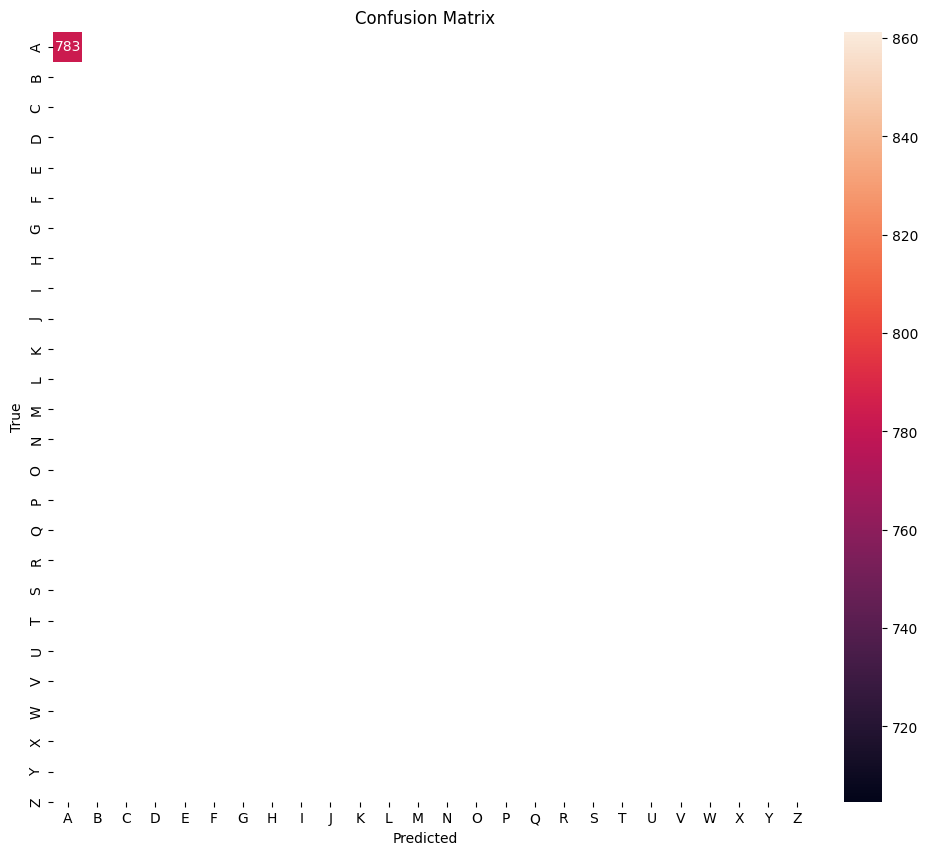

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_map.values(), yticklabels=label_map.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix")
plt.show()


 Add EarlyStopping (optional)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.1, callbacks=[early_stop])


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 208ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
